In [1]:
#Iris Flower Classification Project
#task 1

In [3]:
#import libaries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:

columns=['PetalLengthCm','SepalLengthCm','SepalWidthCm','PetalWidthCm','Species']

df= pd.read_csv('Iris.csv')
df.head(151)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
#check null values(replace null values)
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
#visualize data in graphs

<Axes: >

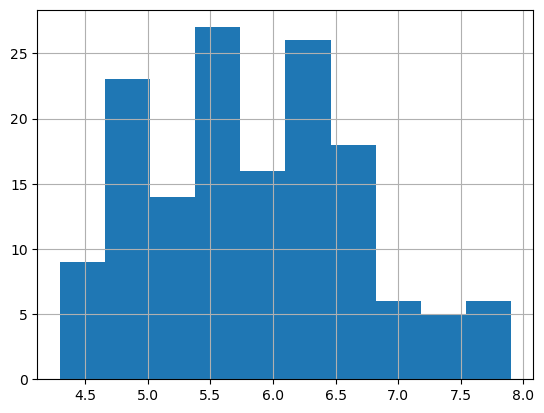

In [9]:
df['SepalLengthCm'].hist()

<Axes: >

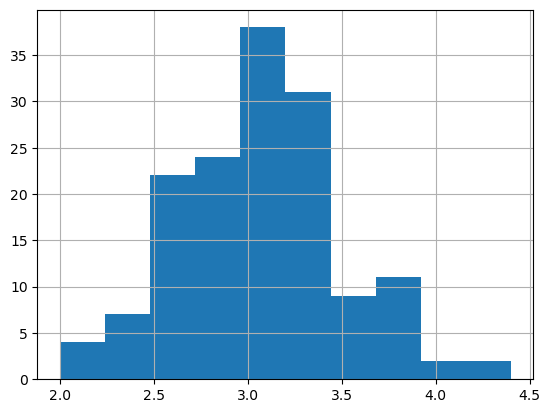

In [10]:
df['SepalWidthCm'].hist()

<Axes: >

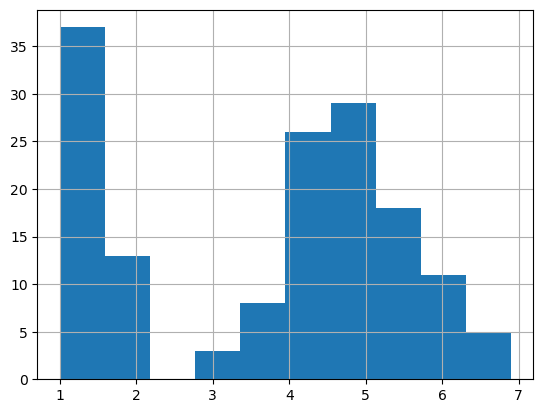

In [11]:
df['PetalLengthCm'].hist()

<Axes: >

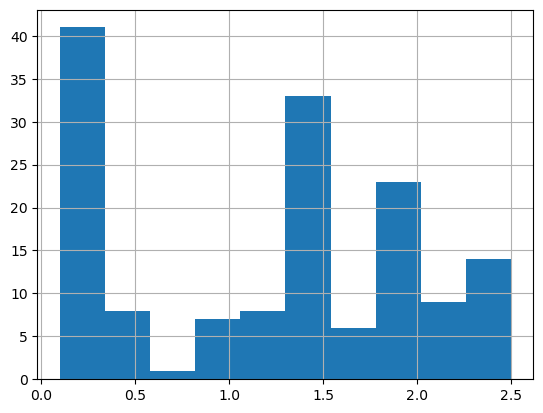

In [12]:
df['PetalWidthCm'].hist()

<Axes: >

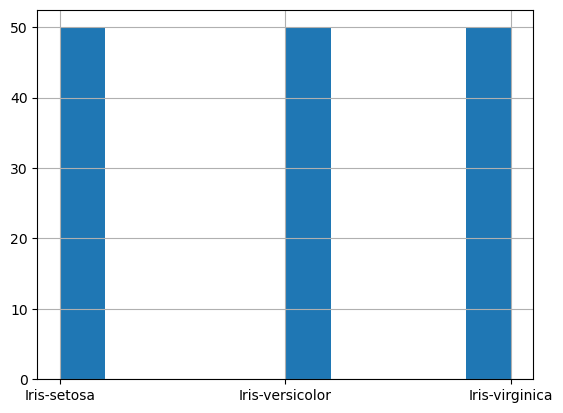

In [13]:
df['Species'].hist()

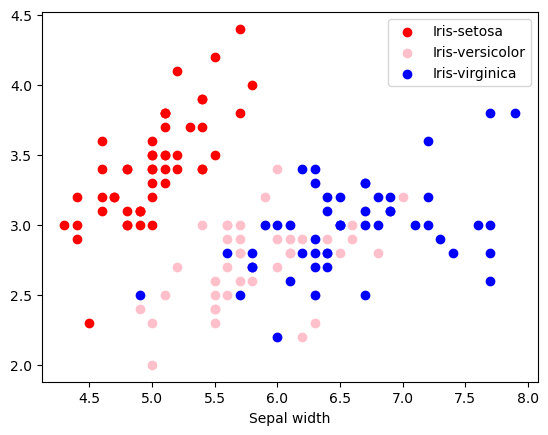

In [14]:
#scatterplot
colors=['red','pink','blue']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal length")  
plt.xlabel("Sepal width")  
plt.legend()

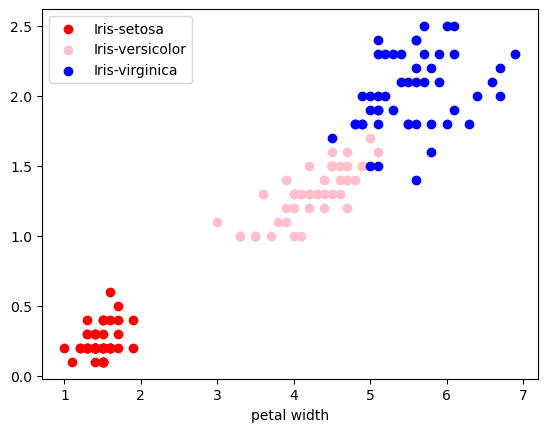

In [15]:

#scatterplot
colors=['red','pink','blue']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("petal length")  
plt.xlabel("petal width")  
plt.legend()


<Axes: >

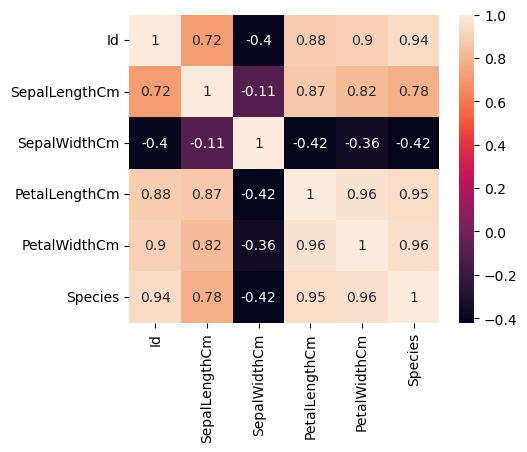

In [26]:
corr = df.corr()
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax)

In [20]:
#label encoder to convert it to numerical one
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [21]:
df['Species']=le.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [27]:
#TRAINING
from sklearn.model_selection import train_test_split
#train=60%
# test=40%
x=df.drop(columns=['Species'])
y=df['Species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40)

In [28]:
#k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [33]:
print("accuracy obtained ",model.score(x_test,y_test)*100)

accuracy obtained  96.66666666666667


In [34]:
y_pred=model.predict(x_test)
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred))
print("accuracy by k-NN model",accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      0.90      0.95        20
           2       0.89      1.00      0.94        17

    accuracy                           0.97        60
   macro avg       0.96      0.97      0.96        60
weighted avg       0.97      0.97      0.97        60

accuracy by k-NN model 0.9666666666666667
